# **Mission 1. Netfilx and Code**

## **Mandatory Part**

### [넷플릭스 데이터](https://www.kaggle.com/shivamb/netflix-shows)가 주어졌을 때, 다음 질문에 답하시오:

* 한국 작품은 총 얼마나 있는가?
    *  `country` column을 기준으로 한다.
    *  "South Korea"인 경우만 인정한다. ("US, South Korea"는 인정하지 않음)

In [1]:
import pandas as pd

# netflix = pd.read_csv("./netflix_titles.csv")
netflix = pd.read_csv("/content/drive/MyDrive/programmers_kdt_II/netflix_titles.csv")

len(netflix[netflix['country'] == 'South Korea'])

183

## **Bonus Part**

### [넷플릭스 데이터](https://www.kaggle.com/shivamb/netflix-shows)가 주어졌을 때, 다음 질문에 답하시오:

* 가장 많은 작품이 올라간 국가는 어디이고, 얼마나 많은 작품이 있는가?
    * `country` column을 기준으로 한다.
    * **단일 국가**인 경우를 기준으로 결과를 구해보자.

In [2]:
import pandas as pd

# netflix = pd.read_csv("./netflix_titles.csv")
netflix = pd.read_csv("/content/drive/MyDrive/programmers_kdt_II/netflix_titles.csv")

grouped = netflix.groupby(by=netflix['country']).count().sort_values('title', ascending=False)
print(grouped.index[0], grouped['title'][0])

United States 2555


# **Mission 2. 가즈아!**

## **Mandatory Part**

### [다음 데이터](https://www.kaggle.com/rishidamarla/bitcoin-prices-20112015)가 주어졌을 때 2016.6 ~ 2017.6 기간의 **5-MA(Moving Average) 비트코인 가격 그래프**를 그려주세요.

* 선의 색깔은 **노란색(#f2a900)** 으로 해야합니다.
* x-axis label과 y-axis label은 적절한 텍스트로 추가되어야 합니다.
* 이동평균의 기준은 `Open` Column으로 계산합니다.
* 이외에도 그래프를 알아보기 쉽게 하기 위한 정보(Text, Facet 등)을 추가하는 것도 좋습니다.
  
💡 이동평균(Moving Average)법은 시계열 데이터를 표현하는 데에 많이 사용하는 방법 중 하나입니다.

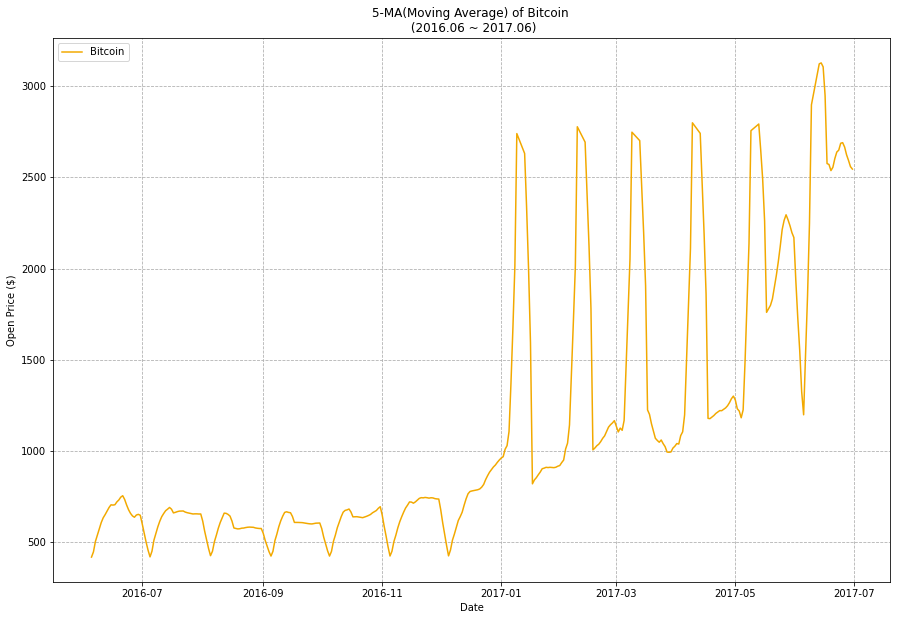

In [3]:
import pandas as pd
import matplotlib.pyplot as plt

import datetime

# bitcoin = pd.read_csv("./BitCoin.csv")
bitcoin = pd.read_csv("/content/drive/MyDrive/programmers_kdt_II/BitCoin.csv")

bit_df = pd.DataFrame({'Date': bitcoin['Date'], 'OpenPrice': bitcoin['Open']})
bit_df['Date'] = pd.to_datetime(bit_df['Date'])

bit_df = bit_df[(bit_df['Date'] >= datetime.datetime(2016, 6, 1)) & (bit_df['Date'] <= datetime.datetime(2017, 6, 30))].sort_values('Date', ascending=True)
bit_df['5-MA'] = bit_df.rolling(5).mean()

plt.figure(figsize=(15, 10))
plt.plot(bit_df['Date'], bit_df['5-MA'], color='#f2a900', label='Bitcoin')
plt.grid(True, axis='both', linestyle='dashed')
plt.legend(loc='upper left')
plt.title('5-MA(Moving Average) of Bitcoin \n (2016.06 ~ 2017.06)')
plt.xlabel('Date')
plt.ylabel('Open Price ($)')
plt.show()

## **Bonus Part**

### 위에 주어진 데이터와 더불어 [다음 데이터](https://www.kaggle.com/prasoonkottarathil/ethereum-historical-dataset?select=ETH_day.csv)도 주어졌을 때,  
### 2016.6 ~ 2017.6 기간에 해당하는 **비트코인의 5-MA 그래프와 이더리움의 5-MA 그래프를 동시**에 그려주세요.

* 선의 색깔은 비트코인 : **노란색(#f2a900)**, 이더리움 : **검은색(#3c3c3d)** 으로 해야합니다.
* x-axis label과 y-axis label은 적절한 텍스트로 추가되어야 합니다.
* 이동평균의 기준은 `Open` Column으로 계산합니다.
* 이외에도 그래프를 알아보기 쉽게 하기 위한 정보(Text, Facet 등)을 추가하는 것도 좋습니다.

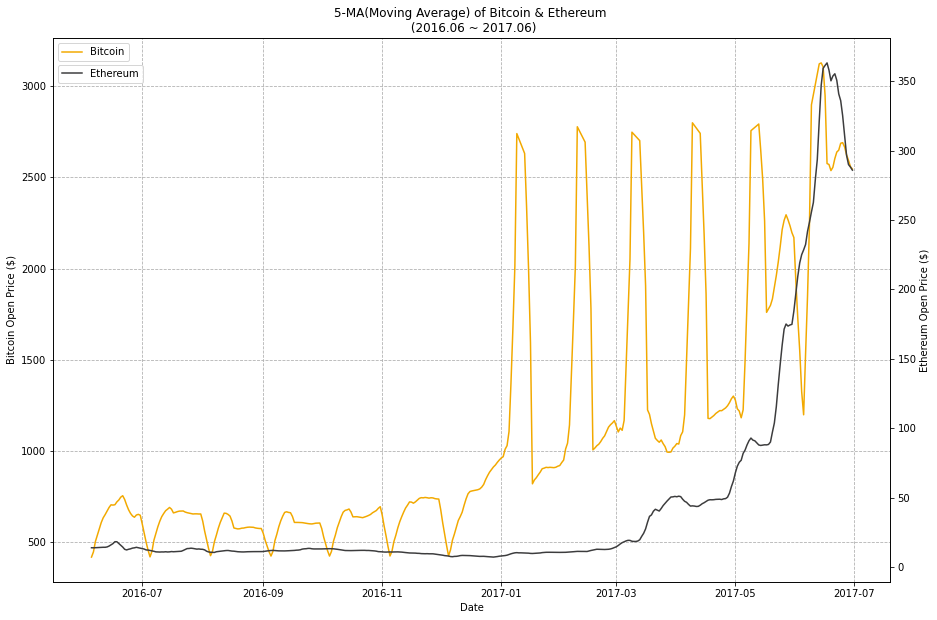

In [4]:
import pandas as pd
import matplotlib.pyplot as plt

import datetime

# bitcoin = pd.read_csv("./BitCoin.csv")
bitcoin = pd.read_csv("/content/drive/MyDrive/programmers_kdt_II/BitCoin.csv")
# ethereum = pd.read_csv("./ETH_day.csv")
ethereum = pd.read_csv("/content/drive/MyDrive/programmers_kdt_II/ETH_day.csv")

bit_df = pd.DataFrame({'Date': bitcoin['Date'], 'OpenPrice': bitcoin['Open']})
bit_df['Date'] = pd.to_datetime(bit_df['Date'])

bit_df = bit_df[(bit_df['Date'] >= datetime.datetime(2016, 6, 1)) & (bit_df['Date'] <= datetime.datetime(2017, 6, 30))].sort_values('Date', ascending=True)
bit_df['5-MA'] = bit_df.rolling(5).mean()

eth_df = pd.DataFrame({'Date': ethereum['Date'], 'OpenPrice': ethereum['Open']})
eth_df['Date'] = pd.to_datetime(eth_df['Date'])

eth_df = eth_df[(eth_df['Date'] >= datetime.datetime(2016, 6, 1)) & (eth_df['Date'] <= datetime.datetime(2017, 6, 30))].sort_values('Date', ascending=True)
eth_df['5-MA'] = eth_df.rolling(5).mean()

plt.figure(figsize=(15, 10))

p1 = plt.subplot()
p1.plot(bit_df['Date'], bit_df['5-MA'], color='#f2a900', label='Bitcoin')
p1.grid(True, axis='both', linestyle='dashed')
p1.set_xlabel('Date')
p1.set_ylabel('Bitcoin Open Price ($)')

p2 = p1.twinx()
p2.plot(eth_df['Date'], eth_df['5-MA'], color='#3c3c3d', label='Ethereum')
# p2.grid(True, axis='both', linestyle='dashed')
p2.set_ylabel('Ethereum Open Price ($)')

p1.legend(loc='upper left')
p2.legend(loc='upper left', bbox_to_anchor=(0, 0.96))

plt.title('5-MA(Moving Average) of Bitcoin & Ethereum \n (2016.06 ~ 2017.06)')
plt.show()